In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json
import time

from hiive.mdptoolbox import mdp, example
from mdp import *
import gym
from openai import OpenAI_MDPToolbox # copied from https://github.com/hiive/hiivemdptoolbox/blob/master/hiive/mdptoolbox/openai.py

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

"""
Author: Anmolbir Mann 
Email: amann33@gatech.edu 
CS7641 Assignment 4: MDP

This Notebook is mainly for exploring/developing 
see/use final python script, main.py to generate final results
"""

RANDOM_SEED = 1994540101
np.random.seed(RANDOM_SEED) # keep results consistent

In [2]:
P, R = example.forest(S=500, r1=4, r2=2, p=0.1, is_sparse=False)
problem_name = "Forest"

In [3]:
lake = OpenAI_MDPToolbox('FrozenLake-v0')
P = lake.P 
R = lake.R
problem_name = "FrozenLake"

Problem: FrozenLake
Function: Value_Iteration
Policies for different gamma values:
{'Gamma: 0.99': (0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0), 'Gamma: 0.9': (0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)}


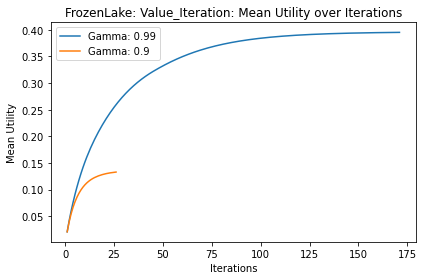

In [9]:
gammas = [0.99, 0.9]
kargs = {
    "P": P, 
    "R": R,
    "problem_name": problem_name,
    "output": "output"
}
rewards, time, policies = run_iterations(gammas=gammas, value_iter=True, **kargs) # value iteration

Problem: FrozenLake
Function: Q-Learning_different_epsilons
Policies for different epsilon values:
{'epsilon: 0.95': (0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 2, 0), 'epsilon: 0.9': (0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 1, 0)}


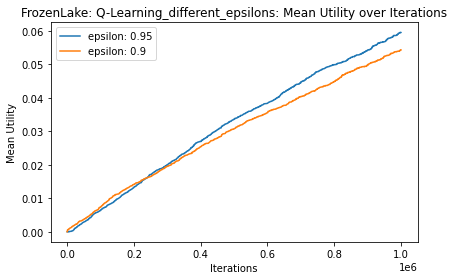

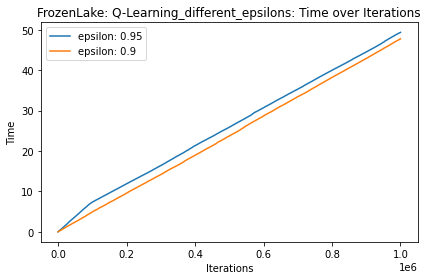

In [7]:
rewards, times, policies = run_qlearnings(P, R, params=[0.95, 0.9], n_iter=1000000, param_alpha=False, show=True, problem_name=problem_name)

In [22]:
ql, q_results = q_learning(plot=True, **kargs, n_iter=100000, e_min=0.001, alpha=0.001)

Q Learning time: 7.467341661453247
policy: (0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0)


In [23]:
q_results[-1]

{'State': 9,
 'Action': 1,
 'Reward': 0.0,
 'Error': 5.492833785804745e-08,
 'Time': 7.467341661453247,
 'Alpha': 0.001,
 'Epsilon': 0.001,
 'Gamma': 0.99,
 'Max V': 0.0693056165466859,
 'Mean V': 0.004544465005985618,
 'Iteration': 100000}